In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random
from sklearn.datasets import load_digits



--- 
 - 다층 퍼셉트론으로 손글씨 분류하기 
   - 이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다. 
   - MNIST 데이터랑 다른 데이터입니다. 


--- 
 - 숫자 필기 데이터 소개 
   - 숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 
   - 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 
   - 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 
   - 그리고 해당 이미지가 1,797개가 있습니다. 
   - load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 
   - 로드한 전체 데이터를 digits에 저장합니다. 


len(digits.images) : 1797


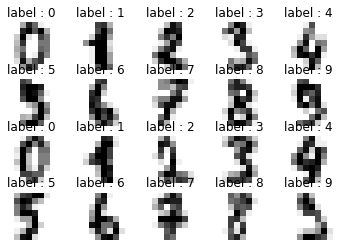

In [2]:


digits = load_digits()
mu.log("len(digits.images)", len(digits.images))

images_labels = list(zip(digits.images, digits.target))
sub_sample_size = 20

for i, (image, label) in enumerate(images_labels[:sub_sample_size]):
    plt.subplot(4, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("label : {}".format(label))

plt.show()



--- 
 - 다층 퍼셉트론 분류기 만들기 



model : 
    Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=10, bias=True)
    ) 
    torch.Size([32, 64]) tensor([[ 0.0032,  0.0661, -0.0140,  ..., -0.0194, -0.0652,  0.0648],
            [-0.0814,  0.0339, -0.0787,  ...,  0.1099, -0.0270, -0.0808],
            [-0.0753,  0.1112,  0.0814,  ..., -0.0767, -0.1129, -0.0418],
            ...,
            [-0.0282,  0.0285,  0.0096,  ...,  0.0652, -0.0413,  0.0944],
            [ 0.0728,  0.0187,  0.0978,  ..., -0.0986,  0.0010, -0.0578],
            [ 0.1202, -0.0861, -0.0830,  ..., -0.0739, -0.1171,  0.0675]])
    torch.Size([32]) tensor([-0.0441,  0.1111, -0.1065, -0.0940, -0.0701, -0.0344,  0.1085,  0.0262,
             0.0809, -0.1119, -0.1131, -0.0510,  0.0844, -0.0986,  0.1203,  0.0620,
            -0.0131,  0.0457,  0.0025, -0.1184,  0.1129, -0.0556, -0.0735, -0

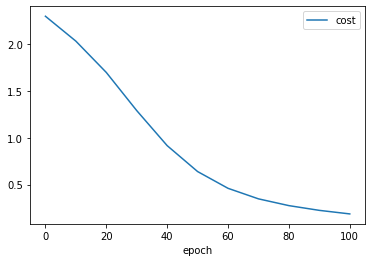

In [3]:


model = nn.Sequential(
    nn.Linear(64, 32),  # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16),  # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10)  # hidden_layer3 = 16, output_layer = 10
)

mu.log("model", model)

X = digits.data  # 이미지. 즉, 특성 행렬
Y = digits.target  # 각 이미지에 대한 레이블

mu.log("len(X)", len(X))
mu.log("X[0].shape", X[0].shape)
mu.log("len(Y)", len(Y))
mu.log("Y[0].shape", Y[0].shape)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
nb_epochs = 100
mu.plt_init()

for epoch in range(nb_epochs + 1):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        mu.log_epoch(epoch, nb_epochs, loss)

mu.plt_show()



--- 
 accuracy 측정 


In [4]:


with torch.no_grad():
    prediction = model(X)
    correct_prediction = torch.argmax(prediction, 1) == Y
    accuracy = correct_prediction.float().mean()
    mu.log("accuracy", accuracy)




accuracy : 
    torch.Size([]) 0.9521424770355225



--- 
 랜덤 5 항목 테스트 


--------------------------------------------------------------------------------
r : 1542
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([8])

single_prediction : 
    torch.Size([1, 10]) tensor([[-4.8552, -2.8179, -4.5502, -1.4480, -2.2460, -1.8032, -1.6843, -0.4846,
              2.2484,  0.0360]])

single_prediction_res : 8


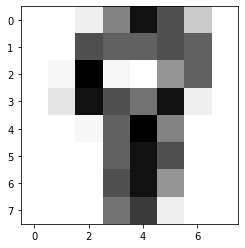

--------------------------------------------------------------------------------
r : 780
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([4])

single_prediction : 
    torch.Size([1, 10]) tensor([[ -1.5211,  -4.9357,  -2.9936, -10.0598,   2.8136,  -5.6555,   0.5482,
              -3.2218,  -5.4876,  -6.7213]])

single_prediction_res : 4


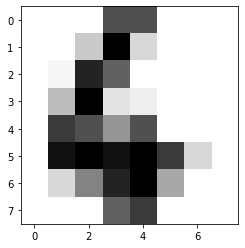

--------------------------------------------------------------------------------
r : 843
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([6])

single_prediction : 
    torch.Size([1, 10]) tensor([[-2.0156, -3.9249, -4.9956, -6.8622, -0.1322, -6.1823,  0.4766, -5.3769,
             -5.2737, -1.3806]])

single_prediction_res : 6


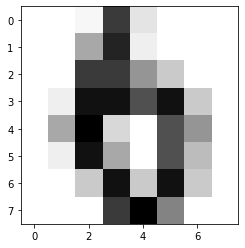

--------------------------------------------------------------------------------
r : 9
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([9])

single_prediction : 
    torch.Size([1, 10]) tensor([[-1.7606, -3.4041, -5.6082, -1.9121, -4.2323, -2.9229, -1.7616, -3.6270,
             -0.5417,  2.1193]])

single_prediction_res : 9


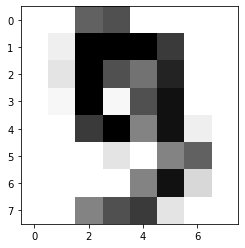

--------------------------------------------------------------------------------
r : 539
X_single_data.shape : torch.Size([1, 64])

Y_single_data : 
    torch.Size([1]) tensor([3])

single_prediction : 
    torch.Size([1, 10]) tensor([[-3.4643,  0.3147,  0.1498,  1.6367, -4.2476, -0.7173, -2.0724, -5.4108,
              2.4757,  0.4383]])

single_prediction_res : 8


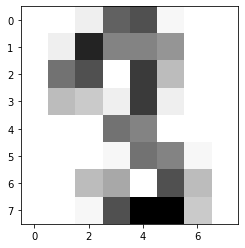

In [5]:


for _ in range(5):
    print("-" * 80)
    r = random.randint(0, len(X) - 1)
    mu.log("r", r)
    X_single_data = X[r:r + 1]
    mu.log("X_single_data.shape", X_single_data.shape)
    Y_single_data = Y[r:r + 1]
    mu.log("Y_single_data", Y_single_data)
    single_prediction = model(X_single_data)
    mu.log("single_prediction", single_prediction)
    single_prediction_res = torch.argmax(single_prediction, 1).item()
    mu.log("single_prediction_res", single_prediction_res)
    mu.plt_img_show(X_single_data.view(8, 8))
